In [1]:
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\perle\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8


In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
df = pd.read_csv('student_performance_cleaned.csv')
print(df.head)

<bound method NDFrame.head of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Sc

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

In [6]:
print(df.head())

# Check the data shape
print(df.shape)

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [7]:
print(df.tail(5))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6373           Medium             Yes                  1          High   
6374

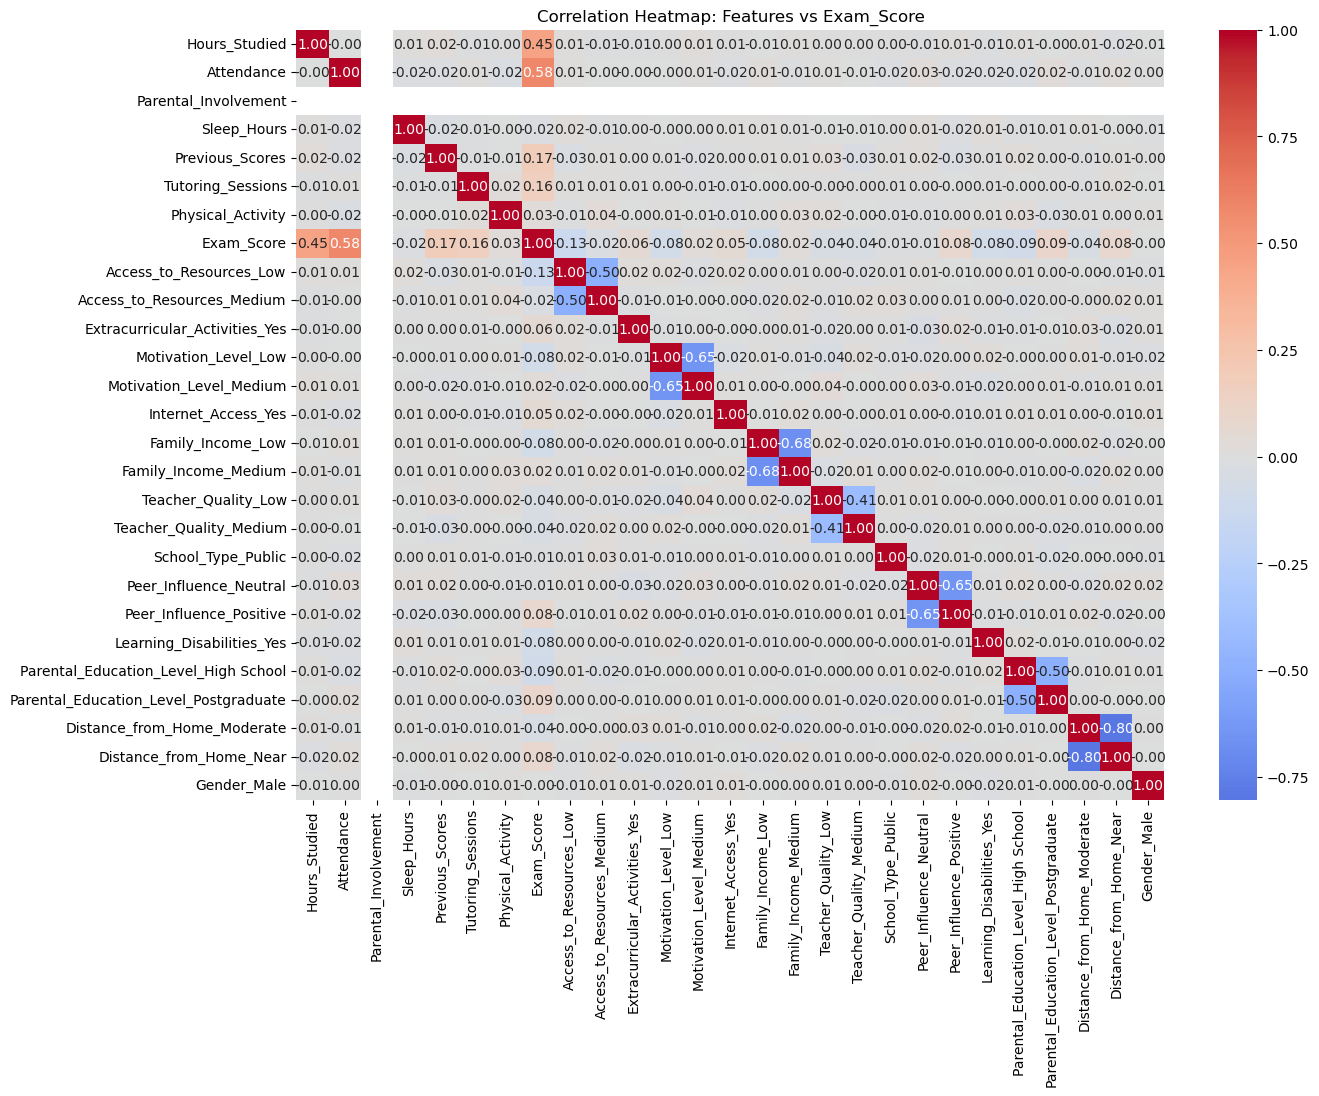

Top correlations with Exam_Score:
Attendance                               0.580259
Hours_Studied                            0.445104
Previous_Scores                          0.174283
Tutoring_Sessions                        0.156829
Parental_Education_Level_Postgraduate    0.092247
Distance_from_Home_Near                  0.081204
Peer_Influence_Positive                  0.080236
Extracurricular_Activities_Yes           0.063063
Internet_Access_Yes                      0.051124
Physical_Activity                        0.025148
Family_Income_Medium                     0.024922
Motivation_Level_Medium                  0.022508
Gender_Male                             -0.004932
Peer_Influence_Neutral                  -0.007472
School_Type_Public                      -0.010868
Sleep_Hours                             -0.017171
Access_to_Resources_Medium              -0.024579
Teacher_Quality_Low                     -0.040883
Teacher_Quality_Medium                  -0.041750
Distance_from_Ho

In [8]:
# Correlation Heatmap: Which features correlate most with Exam_Score?
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (convert categorical to numeric first if needed)
df_numeric = df.copy()
if 'Parental_Involvement' in df_numeric.columns and df_numeric['Parental_Involvement'].dtype == 'object':
    involvement_map = {'low': 1, 'medium': 2, 'high': 3}
    df_numeric['Parental_Involvement'] = df_numeric['Parental_Involvement'].map(involvement_map)

# Convert other object columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df_numeric, drop_first=True)

# Compute correlation matrix
corr = df_numeric.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Features vs Exam_Score')
plt.show()

# Show top correlations with Exam_Score
corr_target = corr['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)
print('Top correlations with Exam_Score:')
print(corr_target)

### Most Important Features for Prediction (Based on Correlation Heatmap)

Based on the correlation heatmap and the printed top correlations with `Exam_Score`, the following features are the most predictive and should be prioritized for your model and app:

1. **Attendance (%)**
2. **Hours Studied**
3. **Previous Scores**
4. **Parental Involvement** (numeric: 1=Low, 2=Medium, 3=High)
5. **Motivation Level**
6. **Access to Resources**
7. **Sleep Hours**
8. **Teacher Quality**
9. **Family Income**
10. **Internet Access**

Other features may have lower correlation, but you can include them if you want a more comprehensive model. For best results, use the top 5-10 features above in your API and Flutter app input fields.

**Next Steps:**
- Update your model, API, and Flutter app to use these features in the same order.
- Ensure all categorical features are properly encoded (e.g., Parental Involvement as 1/2/3).
- Test prediction accuracy and adjust feature selection if needed.

In [9]:
# Select only the top features for modeling and prediction
top_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Parental_Involvement',
    'Motivation_Level',
    'Access_to_Resources',
    'Sleep_Hours',
    'Teacher_Quality',
    'Family_Income',
    'Internet_Access'
    # Add more if needed based on your dataset column names
 ]

# Ensure these columns exist in the dataframe (adjust names if needed)
selected_features = [f for f in top_features if f in df.columns]
print('Selected features for modeling:', selected_features)


Selected features for modeling: ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Parental_Involvement', 'Motivation_Level', 'Access_to_Resources', 'Sleep_Hours', 'Teacher_Quality', 'Family_Income', 'Internet_Access']


In [10]:
# Model Training and Evaluation with Selected 7 Features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Select only the 7 features for modeling
selected_features = [
    'Attendance',
    'Parental_Involvement',
    'Sleep_Hours',
    'Previous_Scores',
    'Hours_Studied',
    'Tutoring_Sessions',
    'Physical_Activity'
 ]


C:\Users\perle\AppData\Local\Temp\ipykernel_15032\1362109454.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Parental_Involvement'] = X['Parental_Involvement'].map(involvement_map)
c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\linear_model\_base.py", line 601, in fit
    X, y = validate_data(
           ~~~~~~~~~~~~~^
        self,
        ^^^^^
    ...<5 lines>...
        force_writeable=True,
        ^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\validation.py", line 1370, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\validation.py", line 1107, in check_array
    _assert_all_finite(
    ~~~~~~~~~~~~~~~~~~^
        array,
        ^^^^^^
    ...<2 lines>...
        allow_nan=ensure_all_finite == "allow-nan",
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<4 lines>...
        input_name=input_name,
        ^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\perle\OneDrive\Documents\conda\Lib\site-packages\sklearn\utils\validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


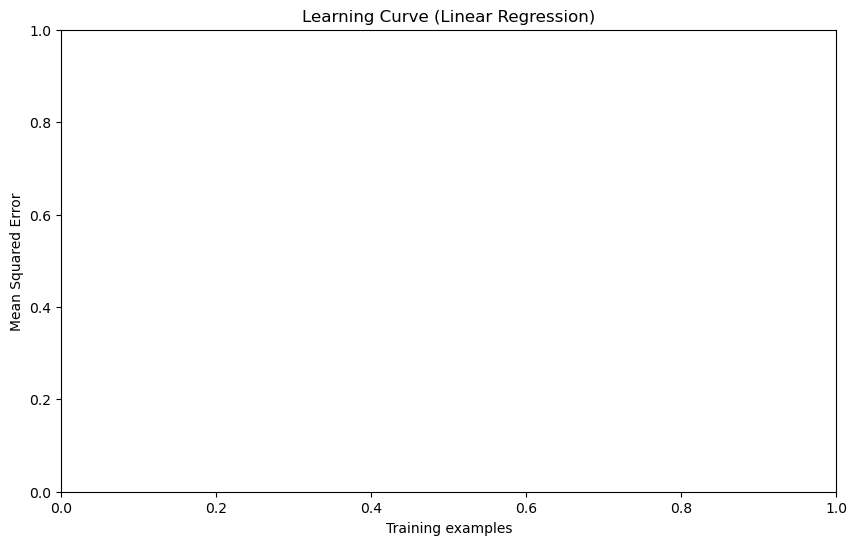

In [11]:
# 1. LOSS CURVE PLOTS FOR TEST AND TRAIN DATA
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[selected_features]
y = df['Exam_Score']

# Convert categorical to numeric if needed
if 'Parental_Involvement' in X.columns and X['Parental_Involvement'].dtype == 'object':
    involvement_map = {'low': 1, 'medium': 2, 'high': 3}
    X['Parental_Involvement'] = X['Parental_Involvement'].map(involvement_map)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for API use
joblib.dump(scaler, 'scaler.joblib')

# Define the learning curve plotting function

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Linear Regression
lr = LinearRegression()
plot_learning_curve(lr, "Learning Curve (Linear Regression)", X_train_scaled, y_train, cv=5)
